## 1. Provide details on connection status using request

In [2]:
# import these two modules bs4 
from bs4 import BeautifulSoup
import requests

In [3]:
#Requests module use to data from given url - Towns of Singapore
url = "https://en.wikipedia.org/wiki/New_towns_of_Singapore" 

#check the get request form url
#source.text 
source=requests.get(url).text

In [4]:
url #check on the url

'https://en.wikipedia.org/wiki/New_towns_of_Singapore'

## 2. Parse the content from the requests using html.parser and lxml

In [5]:
soup = BeautifulSoup(source,'html.parser')
#print(soup.prettify()) #prettify = indentation for clearer reading

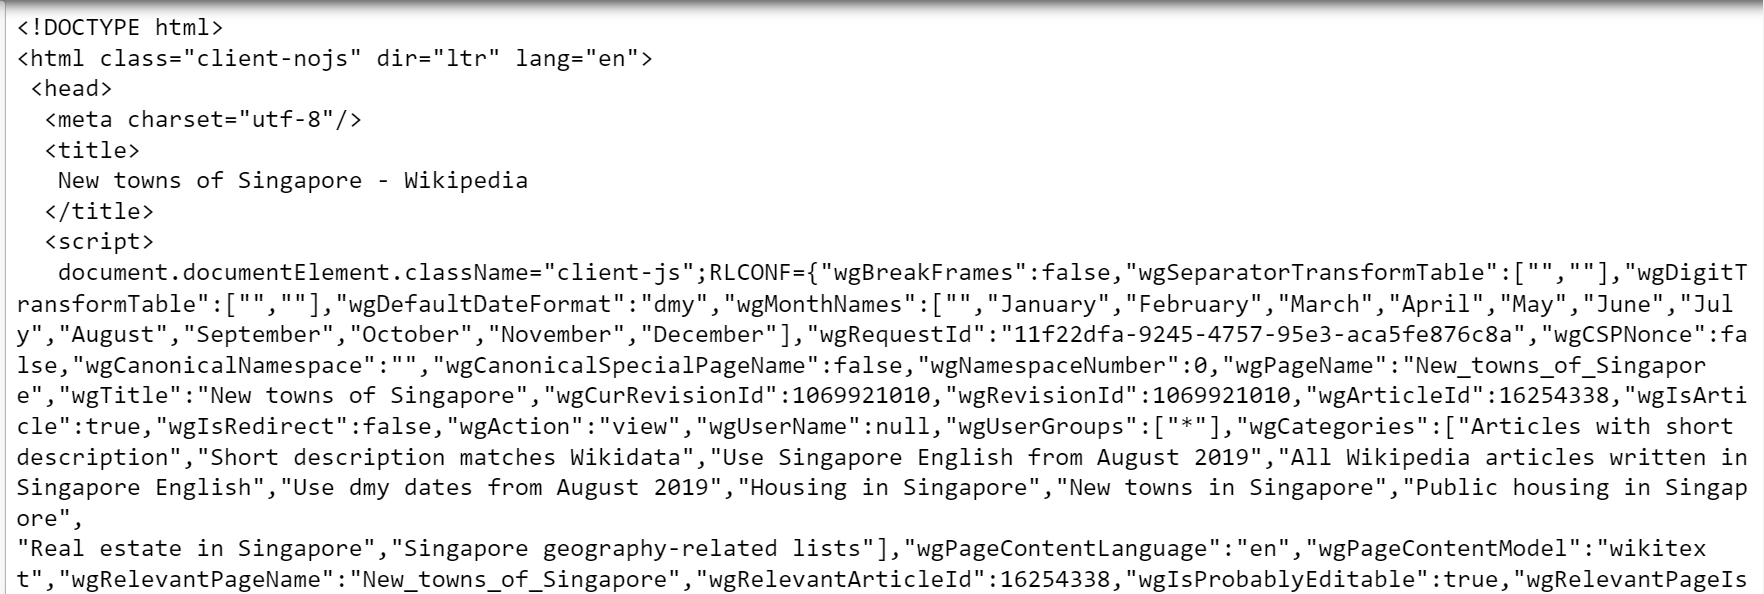

In [6]:
lxml_parse = BeautifulSoup(source,'lxml') # Using lxml
#print(lxml_parse)
#print(lxml_parse.prettify()) #prettify = indentation for clearer reading

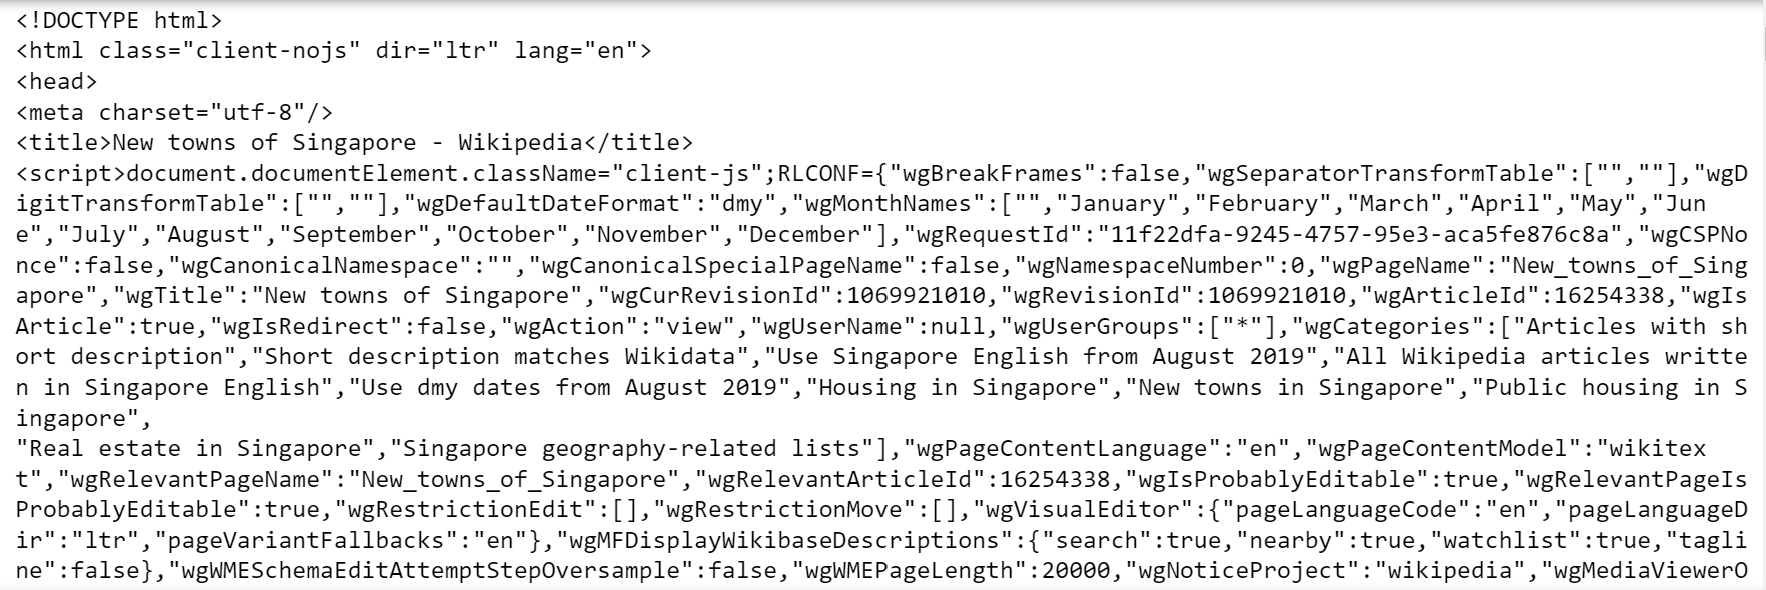

In [7]:
%%timeit
soup = BeautifulSoup(source,'html.parser') #Checking for speed of html.parser

30.7 ms ± 1.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
%%timeit
lxml_parse = BeautifulSoup(source,'lxml') #Checking for speed of lxml

20.8 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## 3. Extract the page titles

In [9]:
#extract the page title
title=soup.find('title')
qwery=soup.find('title') 

print("The page title with html tags :",title)#extract the page title with html
print("The page title is :",qwery.text) 

The page title with html tags : <title>New towns of Singapore - Wikipedia</title>
The page title is : New towns of Singapore - Wikipedia


## 4. Reading the headlines and Sub headlines

In [11]:
soup = BeautifulSoup(source,"lxml")
text = soup.get_text(strip=True)
#text

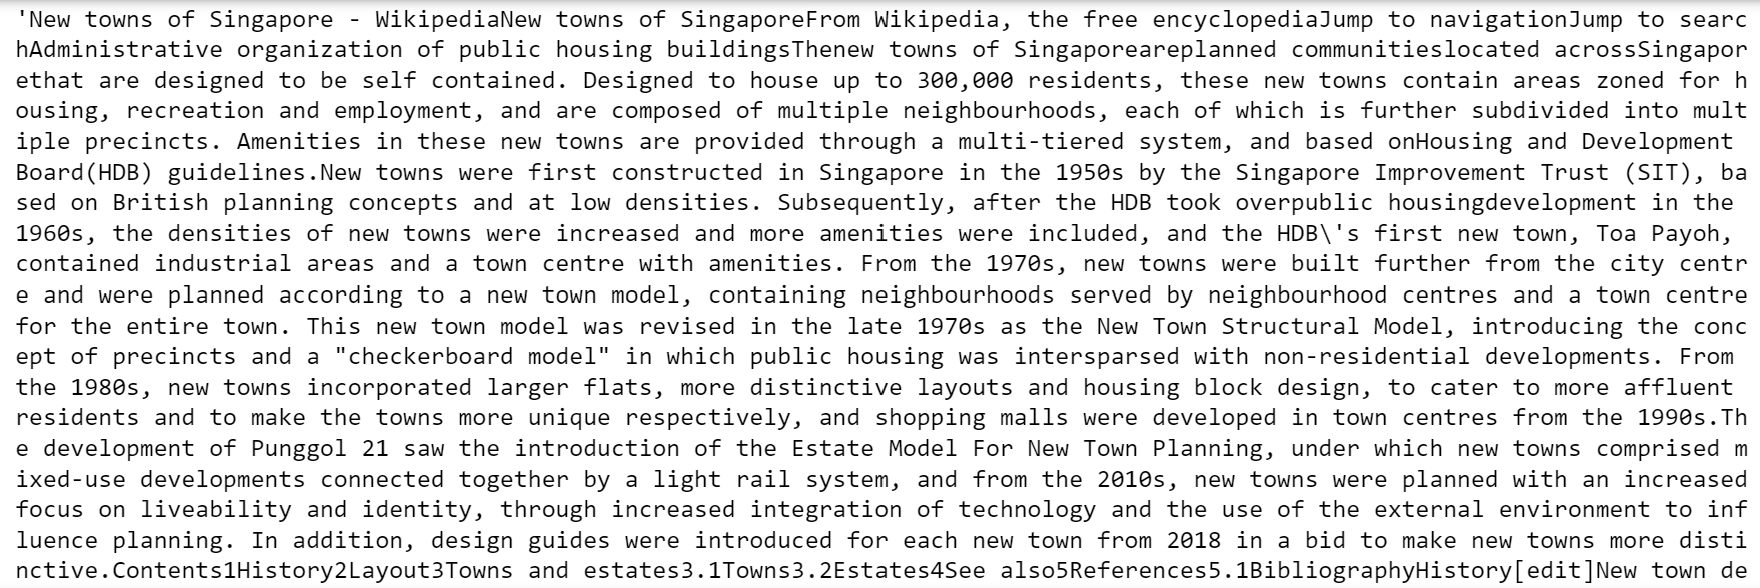

In [26]:
titles = soup.find_all(['h1', 'h2','h3']) # Finding all the headlines and sub headlines
print([title for title in titles])

[<h1 class="firstHeading mw-first-heading" id="firstHeading">New towns of Singapore</h1>, <h2 id="mw-toc-heading">Contents</h2>, <h2><span class="mw-headline" id="History">History</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=New_towns_of_Singapore&amp;action=edit&amp;section=1" title="Edit section: History">edit</a><span class="mw-editsection-bracket">]</span></span></h2>, <h2><span class="mw-headline" id="Layout">Layout</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=New_towns_of_Singapore&amp;action=edit&amp;section=2" title="Edit section: Layout">edit</a><span class="mw-editsection-bracket">]</span></span></h2>, <h2><span class="mw-headline" id="Towns_and_estates">Towns and estates</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=New_towns_of_Singapore&amp;action=edit&amp;section=3" title="Edit section: 

In [27]:
# Reading The Headlines and Sub Headlines
for title in titles:
    print(title.text.strip())
    #print('\n'*1)

New towns of Singapore
Contents
History[edit]
Layout[edit]
Towns and estates[edit]
Towns[edit]
Estates[edit]
See also[edit]
References[edit]
Bibliography[edit]
Navigation menu
Search


## 5. Retrieve contents from a portion of the web page

In [10]:
# Verifying tables and their classes
print('Classes of each table:')
for table in soup.find_all('table'):
    print(table.get('class'))


Classes of each table:
['wikitable', 'sortable']
['wikitable', 'sortable']
['nowraplinks', 'mw-collapsible', 'autocollapse', 'navbox-inner']


In [13]:
# Creating list with all tables
tables = soup.find_all('table')

#  Looking for the table with the classes 'wikitable' and 'sortable'
table = soup.find('table', class_='wikitable sortable')
#table

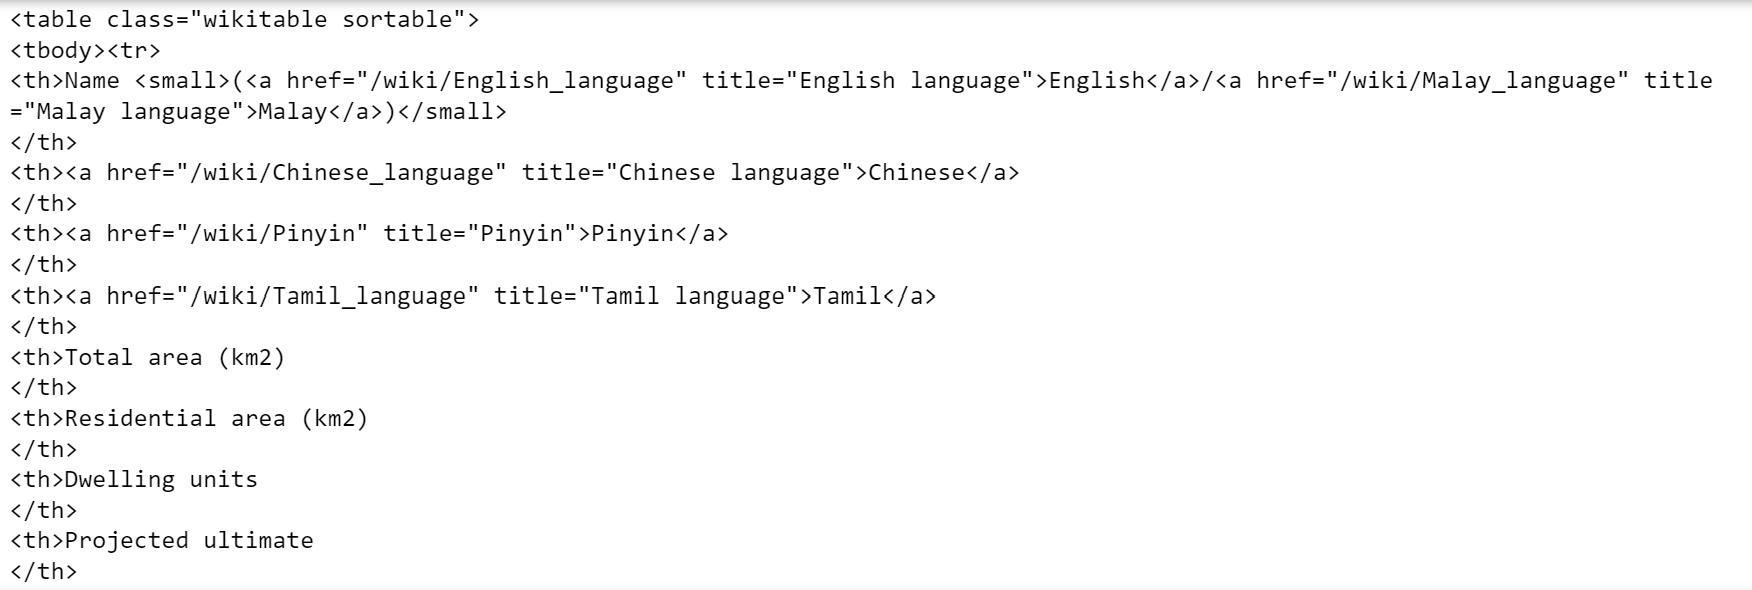

In [14]:
import pandas as pd
import numpy as np
# Defining of the dataframe
df = pd.DataFrame(columns=['Name', 'Total area (km2)', 'Residential area (km2)', 'Dwelling units', 'Projected ultimate', 'Population'])

# Collecting Ddata
for row in table.tbody.find_all('tr'):    
    # Find all data for each column
    columns = row.find_all('td')
    
    if(columns != []):
        name = columns[0].text.strip()
        totalarea = columns[4].text.strip()
        res_area = columns[5].text.strip()
        dw_units = columns[6].text.strip()
        proj = columns[7].text.strip()
        population = columns[8].text.strip()

        df = df.append({'Name': name,  'Total area (km2)': totalarea, 'Residential area (km2)': res_area, 'Dwelling units': dw_units, 'Projected ultimate': proj, 'Population': population}, ignore_index=True)

In [15]:
df

,Name,Total area (km2),Residential area (km2),Dwelling units,Projected ultimate,Population
0,Ang Mo Kio,6.38,2.83,"50,726","58,000","138,200"
1,Bedok,9.37,4.18,"62,816","79,000","187,900"
2,Bishan,6.90,1.72,"20,072","34,000","61,100"
3,Bukit Batok,7.85,2.91,"44,285","54,000","121,400"
4,Bukit Merah,8.58,3.12,"54,227","68,000","141,400"
5,Bukit Panjang,4.89,2.19,"35,325","44,000","118,900"
6,Choa Chu Kang,5.83,3.07,"48,900","62,000","167,200"
7,Clementi,4.12,2.03,"26,730","39,000","69,500"
8,Geylang,6.78,2.14,"30,892","50,000","86,000"
9,Hougang,13.09,3.67,"57,272","72,000","179,700"


In [16]:
df.dtypes

Name                      object
Total area (km2)          object
Residential area (km2)    object
Dwelling units            object
Projected ultimate        object
Population                object
dtype: object

In [17]:
# Convert String to float64 - Area
df['Total area (km2)'] = df['Total area (km2)'].str.replace('%','').astype(np.float64)

In [18]:
# Convert String to float64 - Residential area (km2)
df['Residential area (km2)'] = df['Residential area (km2)'].str.replace('%','').astype(np.float64)

In [19]:
# Convert String to int32 - Price
df['Dwelling units'] = df['Dwelling units'].str.replace(',','').astype(int)

In [20]:
# Convert String to int32 - Price
df['Projected ultimate'] = df['Projected ultimate'].str.replace(',','').astype(int)

In [21]:
# Convert String to int32 - Price
df['Population'] = df['Population'].str.replace(',','').astype(int)

In [22]:
df.dtypes

Name                       object
Total area (km2)          float64
Residential area (km2)    float64
Dwelling units              int32
Projected ultimate          int32
Population                  int32
dtype: object

In [23]:
# Dataframe Change from Object to float and integer
df

,Name,Total area (km2),Residential area (km2),Dwelling units,Projected ultimate,Population
0,Ang Mo Kio,6.38,2.83,50726,58000,138200
1,Bedok,9.37,4.18,62816,79000,187900
2,Bishan,6.90,1.72,20072,34000,61100
3,Bukit Batok,7.85,2.91,44285,54000,121400
4,Bukit Merah,8.58,3.12,54227,68000,141400
5,Bukit Panjang,4.89,2.19,35325,44000,118900
6,Choa Chu Kang,5.83,3.07,48900,62000,167200
7,Clementi,4.12,2.03,26730,39000,69500
8,Geylang,6.78,2.14,30892,50000,86000
9,Hougang,13.09,3.67,57272,72000,179700


In [24]:
# Export a Pandas Dataframe to CSV without an Index
df.to_csv(r'Path_name\singapore_town.csv', index = False)
print (df)

               Name  Total area (km2)  Residential area (km2)  Dwelling units  \
0        Ang Mo Kio              6.38                    2.83           50726   
1             Bedok              9.37                    4.18           62816   
2            Bishan              6.90                    1.72           20072   
3       Bukit Batok              7.85                    2.91           44285   
4       Bukit Merah              8.58                    3.12           54227   
5     Bukit Panjang              4.89                    2.19           35325   
6     Choa Chu Kang              5.83                    3.07           48900   
7          Clementi              4.12                    2.03           26730   
8           Geylang              6.78                    2.14           30892   
9           Hougang             13.09                    3.67           57272   
10      Jurong East              3.84                    1.65           24122   
11      Jurong West         